# Exercise 8
***

## 1.

/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array(69.99751923)

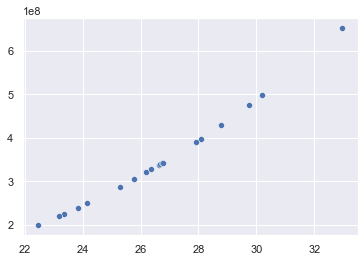

In [1]:
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="darkgrid")

speed = np.load('/Users/max/data/max-speeds.npy')
years = speed.shape[0]
p = [i/(years + 1) for i in range(years)]

spl = sp.interpolate.UnivariateSpline(p, speed)

sns.scatterplot(speed, spl(speed))

fifty = 1 - 0.02
fifty_wind = spl(fifty)
fifty_wind

## 2.

/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([  -1.39717244,    6.16452595, -184.38792774,  -61.32093734])

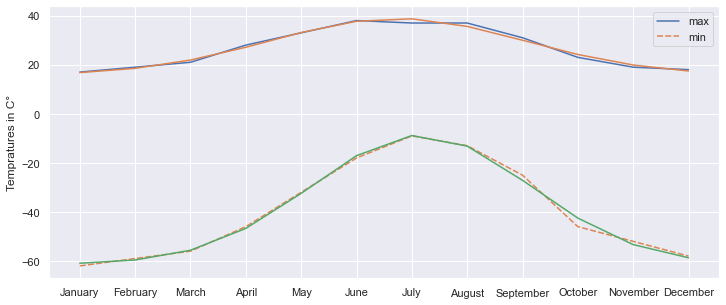

In [97]:
max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

temp = pd.DataFrame(index=pd.date_range('2018-01-01','2018-12-31',freq='M').month_name())
temp['max'] = max
temp['min'] = min

alist = np.arange(0, 12)

def func1(x, std1, m1, s1, n1):
    return s1/(np.sqrt(2 * np.pi) * std1) * np.exp(-(alist - m1)**2/(2*std1)**2) + n1

def func2 (x, std2, m2, s2, n2):
    return s2/(np.sqrt(2 * np.pi) * std2) * np.exp(-(alist - m2)**2/(2*std2)**2) + n2

para_max = sp.optimize.curve_fit(func1, alist ,temp['max'])
para_min = sp.optimize.curve_fit(func2, alist ,temp['min'])

fig = plt.subplots(figsize=(12, 5))
sns.lineplot(data=temp)
sns.lineplot(alist, func1(alist, para_max[0][0], para_max[0][1], para_max[0][2], para_max[0][3]))
sns.lineplot(alist, func2(alist, para_min[0][0], para_min[0][1], para_min[0][2], para_min[0][3]))
plt.ylabel('Tempratures in C°')




para_min[0]

Fit looks really good.

## 3.

In [229]:
def func(x):
        return (4-2.1*x[0]**2 + x[0] ** 4 / 3 )* x[0] ** 2 + x[0] * x[1] + (4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)

x2 = np.array([x, y])

/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_70960/62464611.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


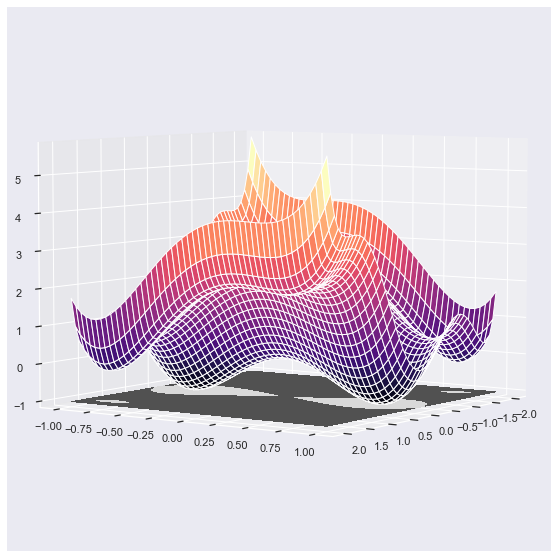

In [230]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

x1, y1 = np.meshgrid(x, y)
z = func(np.array([x1, y1]))

fig = plt.figure(figsize=(10, 10))
color = plt.get_cmap('magma')
ax = fig.gca(projection='3d')
grid = ax.plot_surface(x1, y1, z, cmap=color)
ax.view_init(5, 35)
cset = ax.contourf(x1, y1, z, zdir='z', offset=np.min(z),levels=0, cmap=plt.get_cmap('Greys'))
plt.show()


In [305]:
sol = sp.optimize.minimize(func, x0 =[np.random.uniform(-2, 2, 100), np.random.uniform(-1, 1, 100)])
print(len(sol.x))

200


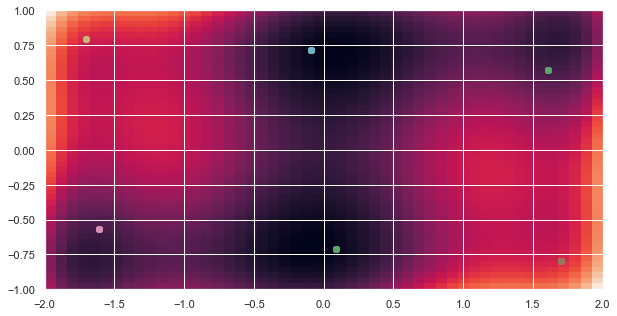

In [342]:
val = np.array
plt.figure(figsize=(10, 10))
plt.imshow(func([x1, y1]), extent=[-2, 2, -1, 1])
for i in range(1000):
    x = np.random.uniform(-2, 2)
    y = np.random.uniform(-1, 1)
    sol = sp.optimize.minimize(func, x0 =[x, y])
    plt.scatter(sol.x[0], sol.x[1])
    val = np.append(val, sol.fun)
plt.show()

In [343]:
val = [ "{:0.2f}".format(x) for x in val[1:]]

In [346]:
val = np.unique(val)
val

array(['-0.22', '-1.03', '2.10'], dtype='<U5')

From the plot above we can see that the function has 6 minima in the given range of x and y. 
The value of the function is in the list val. The function seems to be symmetric because the the values of the minima is the same 
2 points.

In [349]:
sol = sp.optimize.minimize(func, x0 =[0, 0])
sol.x

array([0., 0.])

At the (0,0) the function also have the value 0.

For the initial values (0,0) we stay at the point 0. Probably beacuse it is a saddle point.

## 4.

In [10]:
data = pd.read_table('/Users/max/data/populations.txt')

In [11]:
data

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100
